# Table 5 Visualization Options

This notebook explores different visualization options for Table 5 (Test set performance for multiclass fault classification).

Each option shows a 1x2 subplot with:
- Left: Performance metrics (Accuracy, F1, Precision, Recall)
- Right: Training time as a bar graph

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Data from Table 5
data = {
    'Model': ['LSTM-FCN', 'CNN-Transformer', 'LSTM', 'TransKal', 'XGBoost'],
    'Accuracy': [99.37, 99.20, 99.14, 99.09, 93.91],
    'F1': [0.9937, 0.9920, 0.9914, 0.9909, 0.9416],
    'Precision': [0.9938, 0.9921, 0.9917, 0.9910, 0.9484],
    'Recall': [0.9937, 0.9920, 0.9914, 0.9909, 0.9391],
    'Training_Time_seconds': [26*60+14, 67*60+33, 20*60+5, 31*60+54, 40*60]  # Convert to seconds
}

df = pd.DataFrame(data)

# Convert F1, Precision, Recall to percentages for consistency
df['F1_pct'] = df['F1'] * 100
df['Precision_pct'] = df['Precision'] * 100
df['Recall_pct'] = df['Recall'] * 100

# Training time in minutes for display
df['Training_Time_min'] = df['Training_Time_seconds'] / 60

print(df[['Model', 'Accuracy', 'F1_pct', 'Precision_pct', 'Recall_pct', 'Training_Time_min']])

             Model  Accuracy  F1_pct  Precision_pct  Recall_pct  \
0         LSTM-FCN     99.37   99.37          99.38       99.37   
1  CNN-Transformer     99.20   99.20          99.21       99.20   
2             LSTM     99.14   99.14          99.17       99.14   
3         TransKal     99.09   99.09          99.10       99.09   
4          XGBoost     93.91   94.16          94.84       93.91   

   Training_Time_min  
0          26.233333  
1          67.550000  
2          20.083333  
3          31.900000  
4          40.000000  


In [9]:
# Color scheme for models
colors = {
    'LSTM-FCN': '#2ecc71',       # Green (best)
    'CNN-Transformer': '#3498db', # Blue
    'LSTM': '#9b59b6',            # Purple
    'TransKal': '#e67e22',        # Orange
    'XGBoost': '#e74c3c'          # Red (baseline)
}

metrics = ['Accuracy', 'F1_pct', 'Precision_pct', 'Recall_pct']
metric_labels = ['Accuracy', 'F1', 'Precision', 'Recall']

In [10]:
def create_radar_plot(ax, df, metrics, metric_labels, scale_min=0, scale_max=100, title=''):
    """
    Create a radar plot on the given axes.
    """
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=10)
    
    # Set y-axis limits
    ax.set_ylim(scale_min, scale_max)
    
    # Draw grid lines
    if scale_min == 0:
        yticks = [20, 40, 60, 80, 100]
    else:
        yticks = np.linspace(scale_min, scale_max, 5)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f'{y:.0f}%' for y in yticks], fontsize=8)
    
    # Plot each model
    for idx, row in df.iterrows():
        values = [row[m] for m in metrics]
        values += values[:1]  # Complete the loop
        
        ax.plot(angles, values, 'o-', linewidth=2, 
                label=row['Model'], color=colors[row['Model']], markersize=4)
        ax.fill(angles, values, alpha=0.1, color=colors[row['Model']])
    
    if title:
        ax.set_title(title, fontsize=12, fontweight='bold', pad=15)


def create_training_time_bar(ax, df, title='Training Time'):
    """
    Create a horizontal bar chart for training time.
    """
    # Sort by training time for better visualization
    df_sorted = df.sort_values('Training_Time_min', ascending=True)
    
    bars = ax.barh(df_sorted['Model'], df_sorted['Training_Time_min'], 
                   color=[colors[m] for m in df_sorted['Model']], 
                   edgecolor='black', linewidth=0.5)
    
    # Add value labels
    for bar, time in zip(bars, df_sorted['Training_Time_min']):
        minutes = int(time)
        seconds = int((time - minutes) * 60)
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{minutes}m {seconds}s', va='center', fontsize=9)
    
    ax.set_xlabel('Training Time (minutes)', fontsize=10)
    ax.set_xlim(0, max(df['Training_Time_min']) * 1.25)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

## Option 1: Radar Plot with Full Scale (0-100%)

This version uses the full 0-100% scale, which emphasizes the gap between XGBoost and the deep learning models.

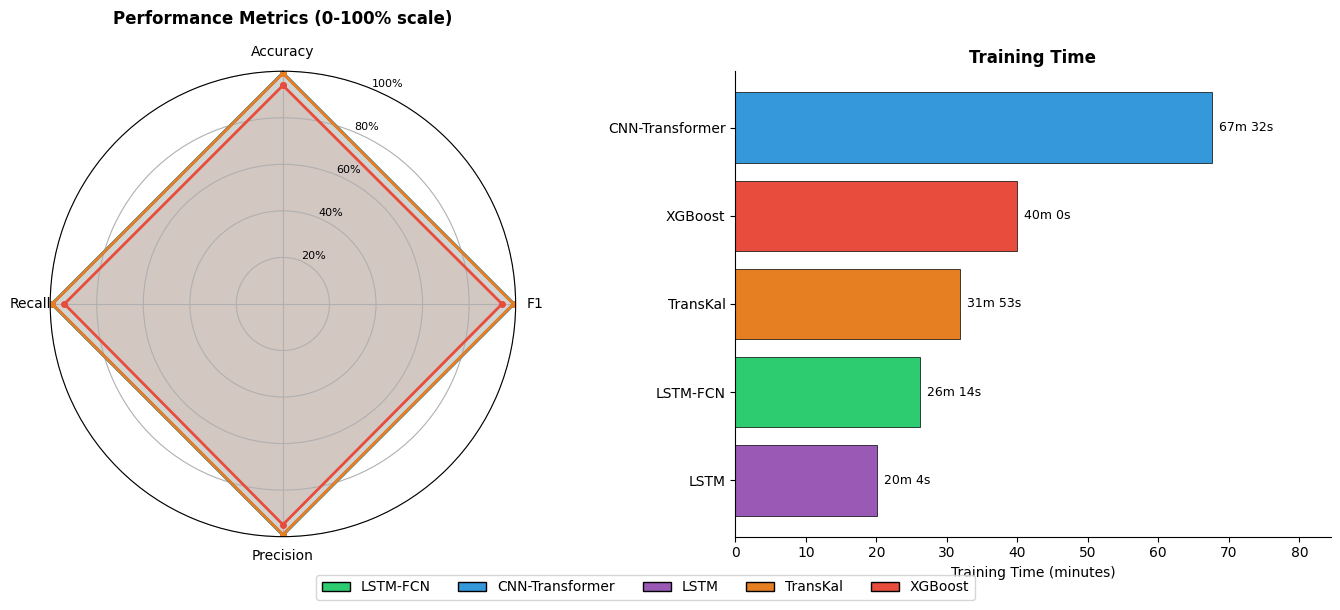

In [11]:
fig = plt.figure(figsize=(14, 6))

# Left: Radar plot
ax1 = fig.add_subplot(121, projection='polar')
create_radar_plot(ax1, df, metrics, metric_labels, scale_min=0, scale_max=100,
                  title='Performance Metrics (0-100% scale)')

# Right: Training time bar chart
ax2 = fig.add_subplot(122)
create_training_time_bar(ax2, df)

# Add legend below the figure
handles = [Patch(facecolor=colors[m], edgecolor='black', label=m) for m in df['Model']]
fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=10, 
           bbox_to_anchor=(0.5, -0.02))


plt.tight_layout()
plt.savefig('../manuscript/figures/table5_option1_full_scale.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Option 2: Radar Plot with Zoomed Scale (90-100%)

This version zooms in to the 90-100% range, which reveals the differences between the deep learning models.

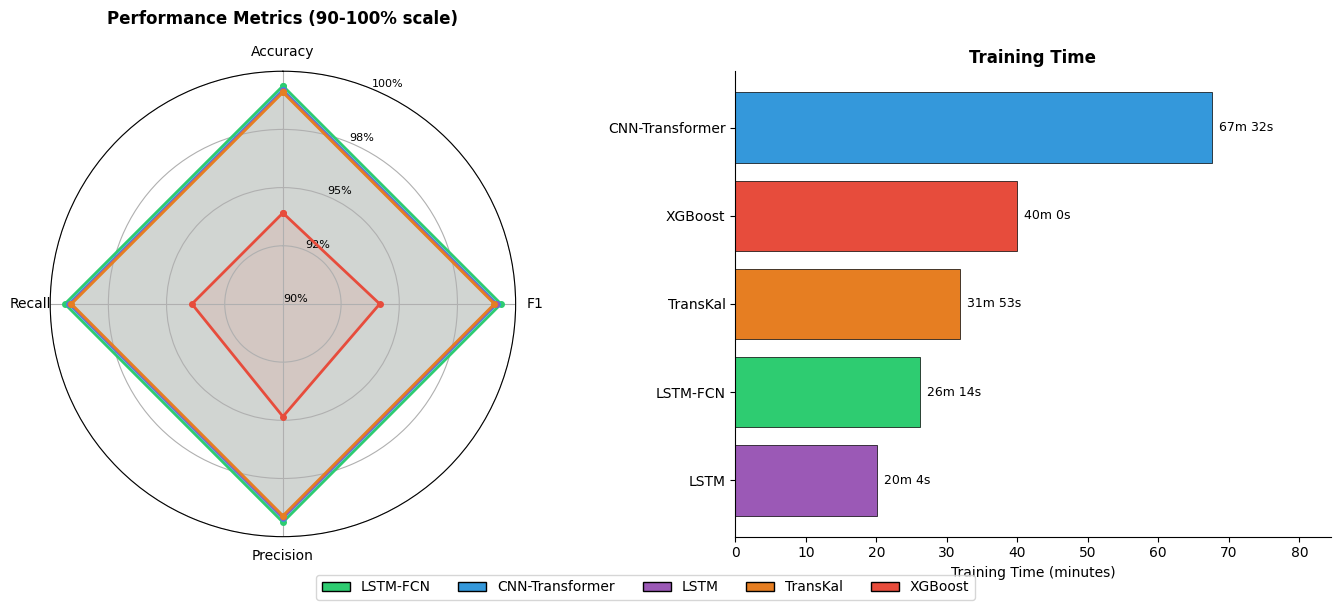

In [12]:
fig = plt.figure(figsize=(14, 6))

# Left: Radar plot with zoomed scale
ax1 = fig.add_subplot(121, projection='polar')
create_radar_plot(ax1, df, metrics, metric_labels, scale_min=90, scale_max=100,
                  title='Performance Metrics (90-100% scale)')

# Right: Training time bar chart
ax2 = fig.add_subplot(122)
create_training_time_bar(ax2, df)

# Add legend below the figure
handles = [Patch(facecolor=colors[m], edgecolor='black', label=m) for m in df['Model']]
fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=10,
           bbox_to_anchor=(0.5, -0.02))


plt.tight_layout()
plt.savefig('../manuscript/figures/table5_option2_zoomed_scale.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Option 3: Lollipop Chart

A lollipop chart provides a clean, modern look for comparing ranked values. Shows F1 score (primary metric) with other metrics as smaller markers.

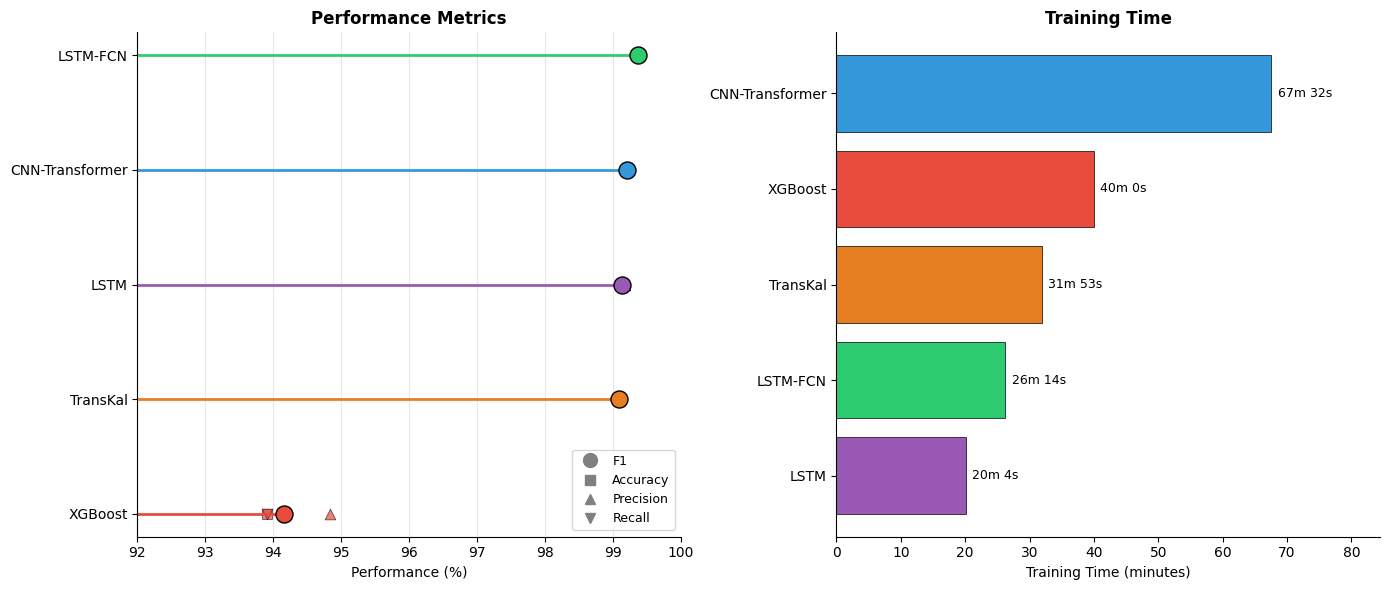

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sort by F1 score
df_sorted = df.sort_values('F1_pct', ascending=True)

# Left: Lollipop chart for metrics
y_pos = np.arange(len(df_sorted))

# Draw stems
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    color = colors[row['Model']]
    
    # Main stem to F1 score
    ax1.hlines(y=i, xmin=90, xmax=row['F1_pct'], color=color, linewidth=2)
    
    # F1 score (main marker)
    ax1.scatter(row['F1_pct'], i, s=150, color=color, zorder=5, 
                edgecolors='black', linewidths=1, label='F1' if i == 0 else '')
    
    # Other metrics as smaller markers
    ax1.scatter(row['Accuracy'], i, s=60, color=color, marker='s', 
                alpha=0.7, edgecolors='black', linewidths=0.5)
    ax1.scatter(row['Precision_pct'], i, s=60, color=color, marker='^',
                alpha=0.7, edgecolors='black', linewidths=0.5)
    ax1.scatter(row['Recall_pct'], i, s=60, color=color, marker='v',
                alpha=0.7, edgecolors='black', linewidths=0.5)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(df_sorted['Model'])
ax1.set_xlim(92, 100)
ax1.set_xlabel('Performance (%)', fontsize=10)
ax1.set_title('Performance Metrics', fontsize=12, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='x', alpha=0.3)

# Add metric legend
from matplotlib.lines import Line2D
metric_handles = [
    Line2D([0], [0], marker='o', color='gray', markersize=10, linestyle='None', label='F1'),
    Line2D([0], [0], marker='s', color='gray', markersize=7, linestyle='None', label='Accuracy'),
    Line2D([0], [0], marker='^', color='gray', markersize=7, linestyle='None', label='Precision'),
    Line2D([0], [0], marker='v', color='gray', markersize=7, linestyle='None', label='Recall'),
]
ax1.legend(handles=metric_handles, loc='lower right', fontsize=9)

# Right: Training time bar chart
create_training_time_bar(ax2, df)


plt.tight_layout()
plt.savefig('../manuscript/figures/table5_option3_lollipop.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Summary Comparison

All three options side by side for comparison.

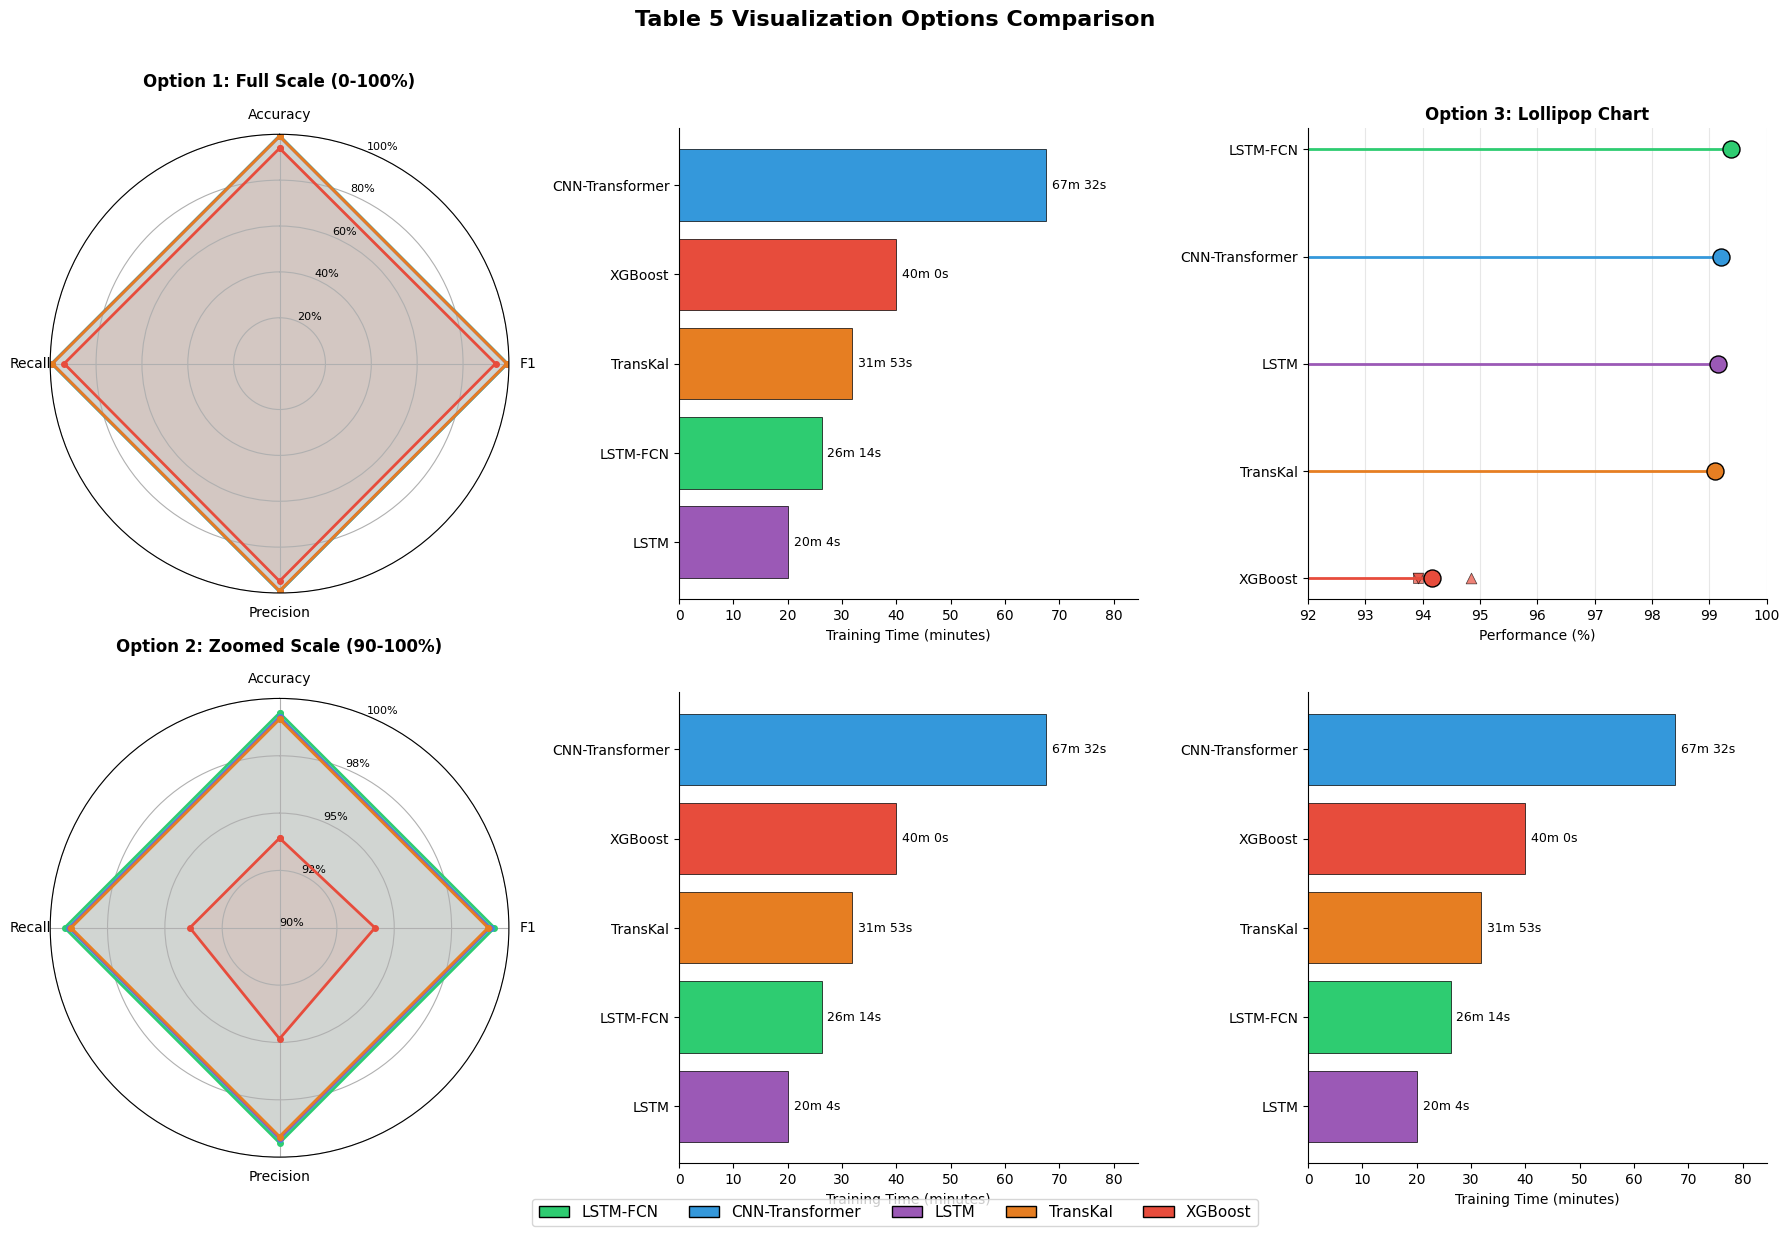

In [14]:
fig = plt.figure(figsize=(18, 12))

# Option 1: Full scale radar
ax1 = fig.add_subplot(231, projection='polar')
create_radar_plot(ax1, df, metrics, metric_labels, scale_min=0, scale_max=100,
                  title='Option 1: Full Scale (0-100%)')

ax2 = fig.add_subplot(232)
create_training_time_bar(ax2, df, title='')

# Option 2: Zoomed scale radar
ax3 = fig.add_subplot(234, projection='polar')
create_radar_plot(ax3, df, metrics, metric_labels, scale_min=90, scale_max=100,
                  title='Option 2: Zoomed Scale (90-100%)')

ax4 = fig.add_subplot(235)
create_training_time_bar(ax4, df, title='')

# Option 3: Lollipop
ax5 = fig.add_subplot(233)
df_sorted = df.sort_values('F1_pct', ascending=True)
y_pos = np.arange(len(df_sorted))

for i, (idx, row) in enumerate(df_sorted.iterrows()):
    color = colors[row['Model']]
    ax5.hlines(y=i, xmin=90, xmax=row['F1_pct'], color=color, linewidth=2)
    ax5.scatter(row['F1_pct'], i, s=150, color=color, zorder=5, edgecolors='black', linewidths=1)
    ax5.scatter(row['Accuracy'], i, s=60, color=color, marker='s', alpha=0.7, edgecolors='black', linewidths=0.5)
    ax5.scatter(row['Precision_pct'], i, s=60, color=color, marker='^', alpha=0.7, edgecolors='black', linewidths=0.5)
    ax5.scatter(row['Recall_pct'], i, s=60, color=color, marker='v', alpha=0.7, edgecolors='black', linewidths=0.5)

ax5.set_yticks(y_pos)
ax5.set_yticklabels(df_sorted['Model'])
ax5.set_xlim(92, 100)
ax5.set_xlabel('Performance (%)', fontsize=10)
ax5.set_title('Option 3: Lollipop Chart', fontsize=12, fontweight='bold')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(axis='x', alpha=0.3)

ax6 = fig.add_subplot(236)
create_training_time_bar(ax6, df, title='')

# Add shared legend
handles = [Patch(facecolor=colors[m], edgecolor='black', label=m) for m in df['Model']]
fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=11,
           bbox_to_anchor=(0.5, -0.01))

plt.suptitle('Table 5 Visualization Options Comparison', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('../manuscript/figures/table5_all_options.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Observations

**Option 1 (Full Scale Radar):**
- Best for emphasizing the gap between XGBoost and deep learning models
- Deep learning models appear nearly identical (all clustered near the outer edge)
- Good for showing that "all neural networks perform similarly well"

**Option 2 (Zoomed Scale Radar):**
- Reveals subtle differences between deep learning models
- Shows LSTM-FCN's slight edge over others
- XGBoost appears more dramatically different
- Risk: May overemphasize small differences that aren't practically significant

**Option 3 (Lollipop Chart):**
- Cleaner, more modern look
- Easier to read precise values
- Natural ranking visualization
- Shows all four metrics without cluttering
- Best for precise comparisons